<a href="https://colab.research.google.com/github/InbarFabian/AppliedFinal/blob/main/AppliedFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Statistics

# Crimes Against Women

The first data we selected is about crimes against women in India.

The data contains 736 samples, each contains the name of a state in india, the year, and the number of cases of different kinds of crimes.

In [ ]:
# Importing libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Uploading the data:

# connecting the drive (not mandatory)
from google.colab import drive
drive.mount('/content/drive')

# uploading the csv
df_crimes = pd.read_csv('/content/drive/MyDrive/CrimesOnWomenData.csv')

df_crimes = df_crimes.drop(columns=['Unnamed: 0'])
df_crimes.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


* Rape: rape cases
* K&A: Kidnapping and Abduction cases
* DD: Dowry Deaths
* AoW: Assault against Women
* AoM: Assault against Modesty of Women
* DV: Domestic Violence
* WT: Women Trafficking

## Visualization

In [ ]:
# First, lets look at the describe function of the dataset:
df_crimes.describe()

,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


To see how versatile our data, we will check how the years and states distributes.

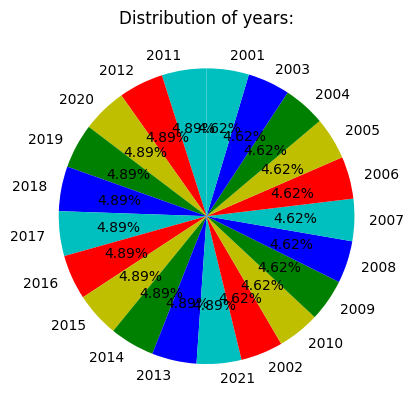

In [ ]:
# Calculate the frequencies of target names
Year_counts = df_crimes['Year'].value_counts()

# Prepare data for the pie chart
labels = Year_counts.index.to_list()
sections = Year_counts.to_numpy()
colors = ['c', 'r', 'y','g','b']

# Create a pie chart
plt.pie(sections, labels=labels, colors = colors, startangle=90, autopct='%1.2f%%')

# Add title and show the pie chart
plt.title('Distribution of years:')
plt.show()

In [ ]:
# Check for missing values
missing_values = df_crimes.isnull().sum()
print(missing_values)

# Check for duplicate rows
duplicate_rows = df_crimes[df_crimes.duplicated(keep=False)]
print(duplicate_rows)

State    0
Year     0
Rape     0
K&A      0
DD       0
AoW      0
AoM      0
DV       0
WT       0
dtype: int64
Empty DataFrame
Columns: [State, Year, Rape, K&A, DD, AoW, AoM, DV, WT]
Index: []


We can see there are no "Null" values or duplicated rows.

To see the boxplots better, we will adress 7 years at a time instead of every year individually.

In [ ]:
def group_years(year):
    if 2001 <= year <= 2007:
        return '2001-2007'
    elif 2008 <= year <= 2014:
        return '2008-2014'
    elif 2015 <= year <= 2021:
        return '2015-2021'

df_crimes['Year_group'] = df_crimes['Year'].apply(group_years)

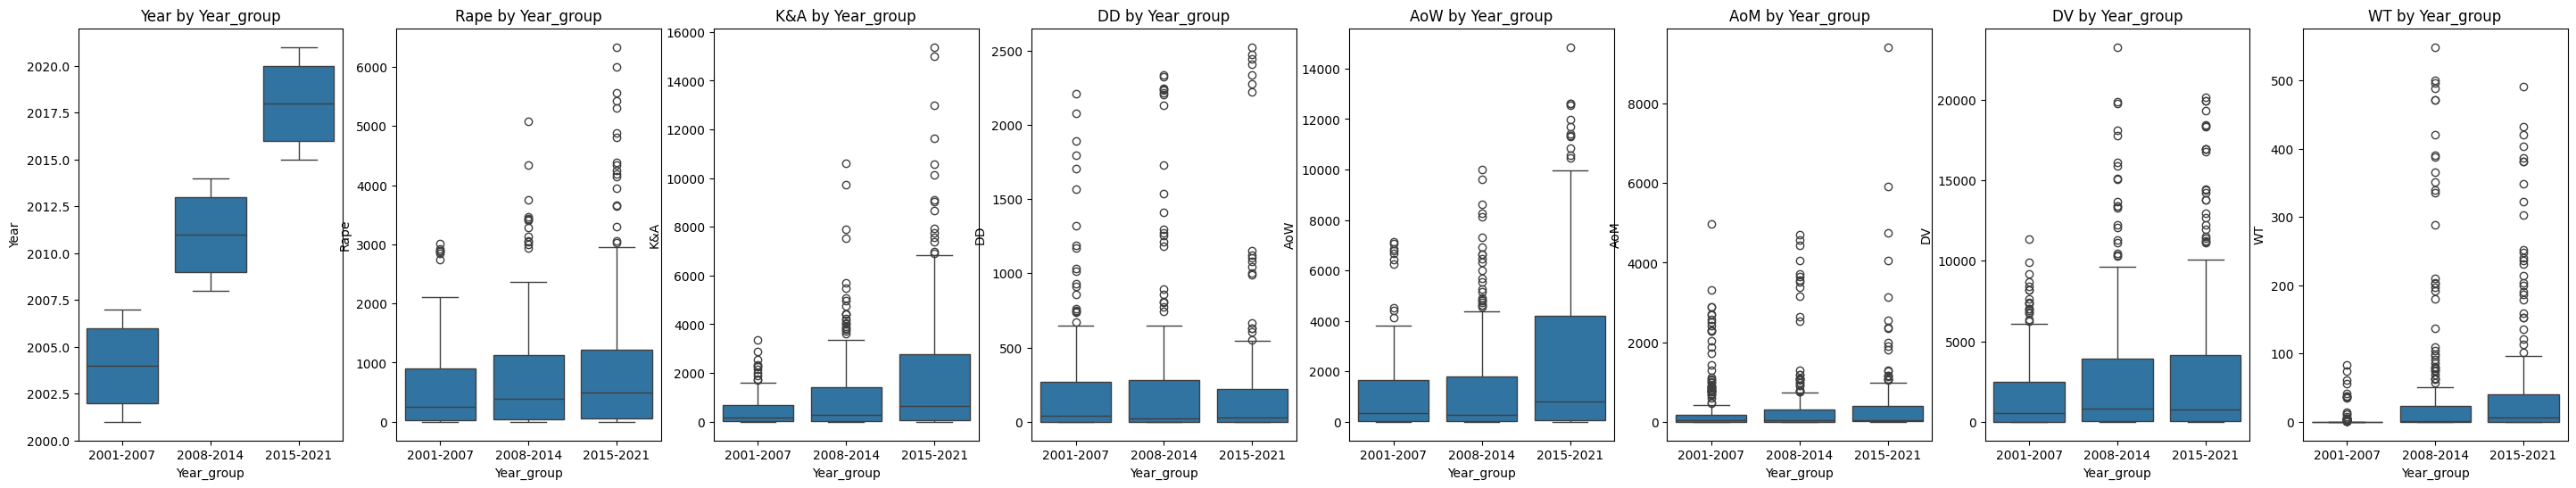

In [ ]:
# Boxplots of the data
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(df_crimes.select_dtypes(include=['int64', 'float64']).columns), figsize=(36, 6))

# Iterate through each numerical column
for i, column in enumerate(df_crimes.select_dtypes(include=['int64', 'float64']).columns):
    # Create a boxplot for each Year_group value
    sns.boxplot(x="Year_group", y=column, data=df_crimes, ax=axes[i])
    axes[i].set_title(f"{column} by Year_group")

# Show the plot
plt.show()

In [ ]:
# Detect and remove outliers:
# Calculate the z-score for each numerical column
z_scores = df_crimes.select_dtypes(include=['int64', 'float64']).apply(lambda x: (x - x.mean()) / x.std())

# Define a threshold for outlier detection
threshold = 2

# Find the indices of outlier rows
outlier_indices = (z_scores > threshold).any(axis=1)

# Filter out the rows that are not outliers
df_crimes_cleaned = df_crimes[~outlier_indices]

# Verify the outliers were removed
print(f"Cleaned dataset shape: {df_crimes_cleaned.shape}")

Cleaned dataset shape: (434, 10)


In [ ]:
df_crimes = df_crimes_cleaned

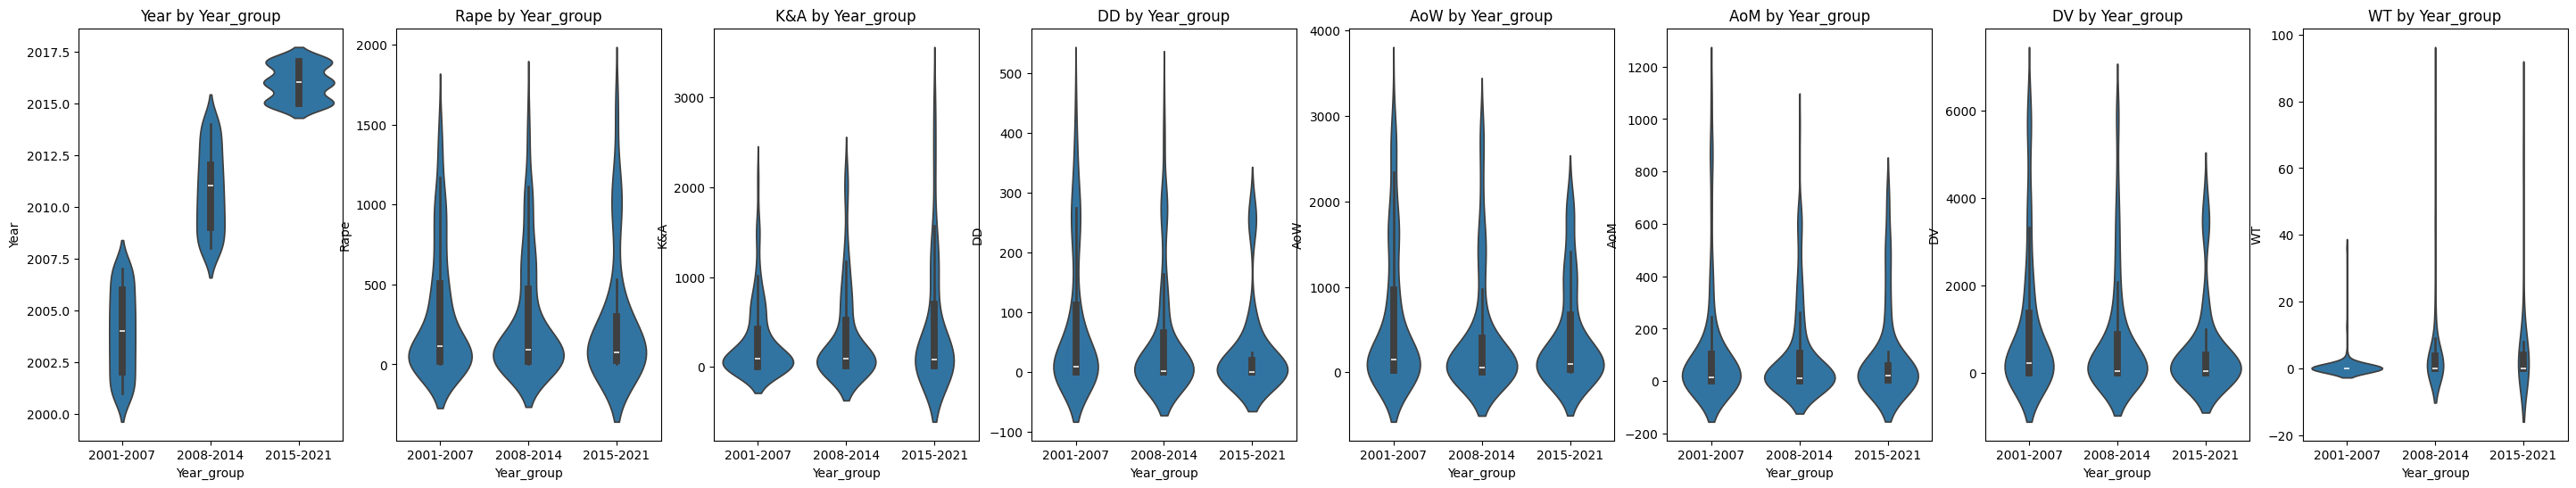

In [ ]:
# Violinplots of the data
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(df_crimes.select_dtypes(include=['int64', 'float64']).columns), figsize=(36, 6))

# Iterate through each numerical column
for i, column in enumerate(df_crimes.select_dtypes(include=['int64', 'float64']).columns):
    # Create a violinplot for each Year_group value
    sns.violinplot(x="Year_group", y=column, data=df_crimes, ax=axes[i])
    axes[i].set_title(f"{column} by Year_group")

# Show the plot
plt.show()

As we can see, most of the plots looks like they are not distributes normally.

We can also see there is no significant difference between the years. To check this formaly, we will do an 'anova' test:

In [ ]:
from sklearn.feature_selection import f_classif

X = df_crimes.drop(columns=['Year_group', 'State', 'Year'])
y = df_crimes['Year_group']

# Perform ANOVA F-test for each feature
f_values, p_values = f_classif(X, y)

# Create a DataFrame to store the results
anova_results = pd.DataFrame({'feature': X.columns,'f_value': f_values,'p_value': p_values})

# Sort the DataFrame by p-value
anova_results = anova_results.sort_values(by='p_value', ascending=True)

# Print the results
print(anova_results)

  feature    f_value       p_value
1     K&A  35.232945  2.454927e-15
3     AoW  23.454462  1.338201e-10
6      WT  19.948916  3.663202e-09
0    Rape  11.030210  1.906828e-05
5      DV   9.855763  5.973615e-05
2      DD   0.706487  4.937100e-01
4     AoM   0.237305  7.888116e-01


Let's try to see how different states affect crimes against women.

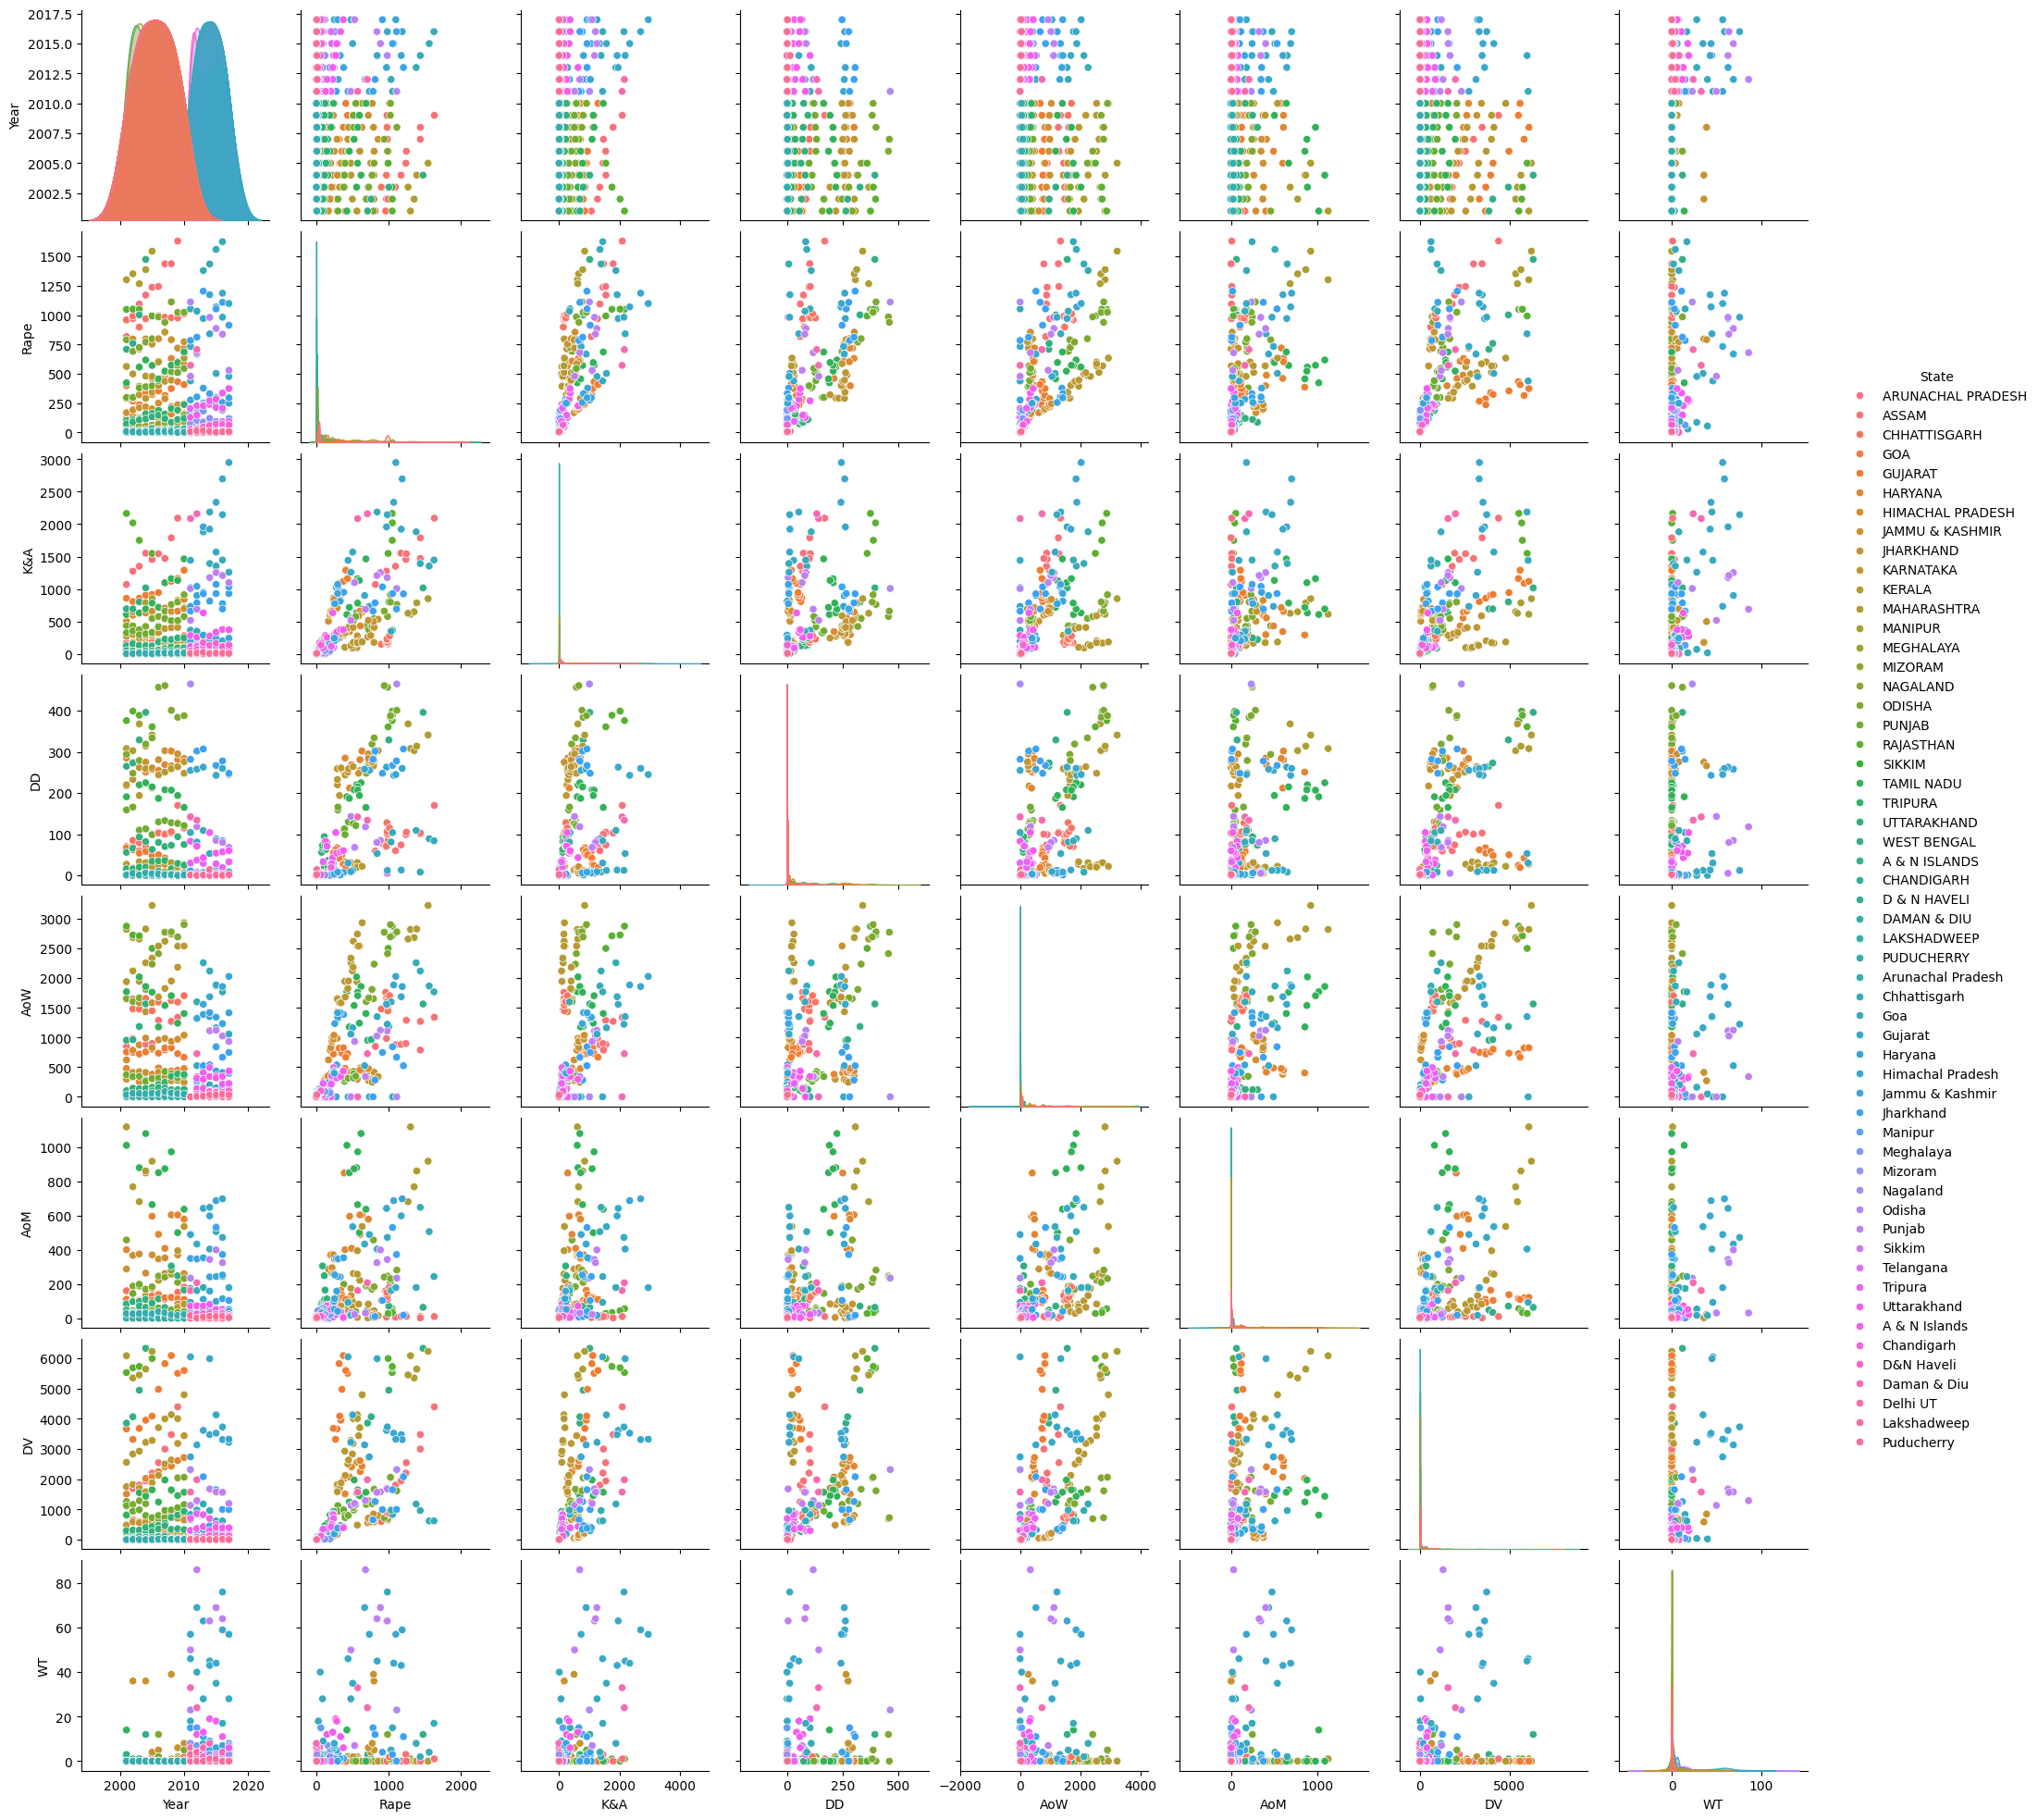

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(df_crimes, hue="State")
plt.show()